<a href="https://colab.research.google.com/github/GrainSack/ML/blob/main/BasicClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import time as time
import random as random
import networkx as nx 
import pandas as pd
from scipy.sparse import csgraph
import numpy as np
from scipy.sparse import spdiags, issparse
from scipy.sparse.linalg import lobpcg, LinearOperator
from scipy.sparse import diags, random
from numpy.linalg import eig
import sys

In [7]:
data = pd.read_csv('karate_club.adjlist',header = None , skiprows = 3,sep=' ')

In [8]:
data = data.drop(0, axis=1)

In [9]:
data.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,10.0,11.0,12.0,13.0,17.0,19.0,21.0,31.0
1,2.0,3.0,7.0,13.0,17.0,19.0,21.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,7.0,8.0,9.0,13.0,27.0,28.0,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7.0,12.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
def adjmatrix(data):
  m = np.zeros((int(len(data)), int(len(data))))

  for i in range (len(data)):
    for j in range (len(data.iloc[i])):
      if np.isnan(data.iloc[i][j+1]) == True:
        pass
      else:
        m[i,int(data.iloc[i][j+1])] = 1
        m[int(data.iloc[i][j+1]),i] = 1
  return m


def laplacianmatrix(matrix):
  m = adjmatrix(m)
  laplacian_matirx = csgraph.laplacian(m)

  return laplacian_matirx

In [11]:
N = 34

m = adjmatrix(data)

diag = np.zeros((N,N))
for i in range (N):
  di = 0
  for j in range (N):
    di += m[i,j]
  diag[i,i] = di

laplacian_matrix = csgraph.laplacian(m) # M - diag matrix

In [12]:
laplacian_matrix

array([[16., -1., -1., ..., -1., -0., -0.],
       [-1.,  9., -1., ..., -0., -0., -0.],
       [-1., -1., 10., ..., -0., -1., -0.],
       ...,
       [-1., -0., -0., ...,  6., -1., -1.],
       [-0., -0., -1., ..., -1., 12., -1.],
       [-0., -0., -0., ..., -1., -1., 17.]])

In [13]:
w,v=eig(laplacian_matrix)
print('E-value:', w)
print('E-vector', v)

E-value: [ 1.81366960e+01  1.70551712e+01  1.33061223e+01  1.09210675e+01
  9.77724095e+00  6.99619703e+00  6.51554463e+00  6.33159222e+00
 -3.40075425e-15  5.37859508e+00  4.68525227e-01  4.58079267e+00
  4.48000767e+00  4.27587682e+00  9.09247664e-01  1.12501072e+00
  1.25940411e+00  1.59928308e+00  1.76189862e+00  1.82605521e+00
  1.95505045e+00  2.48709173e+00  2.74915718e+00  3.01396297e+00
  3.24206748e+00  3.47218740e+00  3.37615409e+00  5.61803399e+00
  3.38196601e+00  2.00000000e+00  2.00000000e+00  2.00000000e+00
  2.00000000e+00  2.00000000e+00]
E-vector [[ 1.93749031e-01 -9.40932167e-01 -9.47825261e-02 ...  3.63253398e-17
  -3.17933173e-17  5.95375162e-17]
 [ 5.22422164e-03  6.58647640e-02  9.91845054e-02 ... -2.78567562e-16
  -4.28819181e-17 -1.15427017e-16]
 [ 2.91860881e-02  1.15069117e-01 -3.14797911e-01 ...  2.51454651e-17
  -4.33474766e-17  1.09973613e-16]
 ...
 [-8.55124031e-02  7.68509217e-02 -1.23027130e-01 ...  8.27086850e-18
  -2.82182760e-17 -1.04576545e-17]
 [-

In [214]:
np.set_printoptions(threshold=sys.maxsize)
print(m[32])

[0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1.]


In [14]:
N = 34
rng = np.random.default_rng()
#m += 1e-2 * random(N, N, density=0.1, random_state=rng)
rng = np.random.default_rng()
X = rng.random((len(m), 1))
Y = np.ones((len(m), 1))

In [15]:
for cut in ["max", "min"]:
    L, d = csgraph.laplacian(m,return_diag=True)
    _, eves = lobpcg(L, X=X, Y=Y, largest=False, tol=1e-3)
    print(eves)
    eves *= np.sign(eves[0, 0]) 
    print(cut + "-cut labels:\n", 1 * (eves[:, 0]>0)) 

[[ 0.11198138]
 [ 0.04015315]
 [-0.02361401]
 [ 0.05460318]
 [ 0.28543661]
 [ 0.3241197 ]
 [ 0.32367972]
 [ 0.05166961]
 [-0.05171525]
 [-0.09367964]
 [ 0.28495975]
 [ 0.21296022]
 [ 0.10896931]
 [ 0.01433794]
 [-0.16268874]
 [-0.16169887]
 [ 0.42310433]
 [ 0.09910425]
 [-0.16278823]
 [ 0.01351391]
 [-0.16200428]
 [ 0.09935759]
 [-0.16154258]
 [-0.15571976]
 [-0.15463649]
 [-0.16143023]
 [-0.18486719]
 [-0.12835018]
 [-0.09516603]
 [-0.16669618]
 [-0.07396605]
 [-0.09893012]
 [-0.13019786]
 [-0.11825894]]
max-cut labels:
 [1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
[[ 0.11198138]
 [ 0.04015315]
 [-0.02361401]
 [ 0.05460318]
 [ 0.28543661]
 [ 0.3241197 ]
 [ 0.32367972]
 [ 0.05166961]
 [-0.05171525]
 [-0.09367964]
 [ 0.28495975]
 [ 0.21296022]
 [ 0.10896931]
 [ 0.01433794]
 [-0.16268874]
 [-0.16169887]
 [ 0.42310433]
 [ 0.09910425]
 [-0.16278823]
 [ 0.01351391]
 [-0.16200428]
 [ 0.09935759]
 [-0.16154258]
 [-0.15571976]
 [-0.15463649]
 [-0.16143023]
 [-0.1848671

In [16]:
w_index = []
for i in range ((len(w))):
  w_index.append([i,eves[i]])

In [17]:
w_index = sorted(w_index,key = lambda x : x[1], reverse = False)

In [21]:
e = np.linalg.eigvals(L)

In [18]:
v_index = []
for i in range (len(v[14])):
  v_index.append([i,eves[i]])

group_label = []

for i in range ((len(v_index))):
  if v_index[i][1] < 0:
    group_label.append([v_index[i][0], 0])
  else:
    group_label.append([v_index[i][0], 1])
print(group_label)

[[0, 1], [1, 1], [2, 0], [3, 1], [4, 1], [5, 1], [6, 1], [7, 1], [8, 0], [9, 0], [10, 1], [11, 1], [12, 1], [13, 1], [14, 0], [15, 0], [16, 1], [17, 1], [18, 0], [19, 1], [20, 0], [21, 1], [22, 0], [23, 0], [24, 0], [25, 0], [26, 0], [27, 0], [28, 0], [29, 0], [30, 0], [31, 0], [32, 0], [33, 0]]


In [24]:
v_index = []
for i in range (len(v[14])):
  v_index.append([i,v[14][i]])

print(v_index)

[[0, -0.05480701457449808], [1, -0.008468721886267369], [2, -0.08199444022362129], [3, -0.029616620666057022], [4, 0.0007961973733652933], [5, 0.0037386218331475277], [6, 0.03344215099765644], [7, 0.010676403858786938], [8, 0.17149858514250915], [9, -0.015489167099596047], [10, 0.1627507847356817], [11, 0.014041267495144942], [12, 0.012689162957004781], [13, 0.0008825667081727542], [14, -0.06068002545511491], [15, -0.0634564419776006], [16, 0.21948747009269146], [17, -0.19879544213662154], [18, 0.019309862298922092], [19, 0.11734479088876508], [20, 0.0038936556890638665], [21, -0.09454123504535654], [22, 0.02122913655494379], [23, 0.04139758885289981], [24, 0.0986321040900208], [25, -0.0237468467560581], [26, -0.02496270622499549], [27, -1.5222741385562424e-16], [28, -1.060326451192941e-15], [29, 0.352790062862384], [30, -0.6468010429891051], [31, -0.045665010907241864], [32, 0.11187573661415434], [33, 0.37104944627482594]]


In [19]:
eves_new = sorted(eves,key = lambda x : x[0], reverse = False)

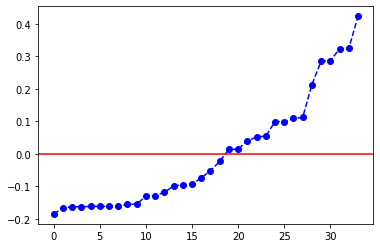

In [31]:
import matplotlib.pyplot as plt
plt.plot(eves_new, 'bo--')
plt.axhline(y = 0, color = 'red', linestyle = '-')
plt.show()

In [26]:
v_index

[[30, -0.6468010429891051],
 [17, -0.19879544213662154],
 [21, -0.09454123504535654],
 [2, -0.08199444022362129],
 [15, -0.0634564419776006],
 [14, -0.06068002545511491],
 [0, -0.05480701457449808],
 [31, -0.045665010907241864],
 [3, -0.029616620666057022],
 [26, -0.02496270622499549],
 [25, -0.0237468467560581],
 [9, -0.015489167099596047],
 [1, -0.008468721886267369],
 [28, -1.060326451192941e-15],
 [27, -1.5222741385562424e-16],
 [4, 0.0007961973733652933],
 [13, 0.0008825667081727542],
 [5, 0.0037386218331475277],
 [20, 0.0038936556890638665],
 [7, 0.010676403858786938],
 [12, 0.012689162957004781],
 [11, 0.014041267495144942],
 [18, 0.019309862298922092],
 [22, 0.02122913655494379],
 [6, 0.03344215099765644],
 [23, 0.04139758885289981],
 [24, 0.0986321040900208],
 [32, 0.11187573661415434],
 [19, 0.11734479088876508],
 [10, 0.1627507847356817],
 [8, 0.17149858514250915],
 [16, 0.21948747009269146],
 [29, 0.352790062862384],
 [33, 0.37104944627482594]]

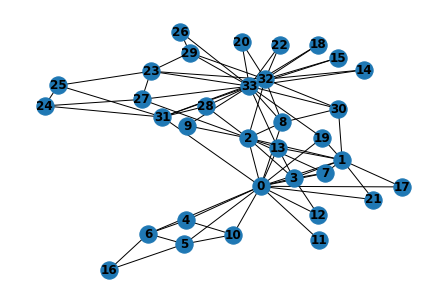

In [27]:
G = nx.empty_graph(34)
for i in range ((len(m))):
  for j in range ((len(m))):
    if j >= i and m[i,j] ==1:
      G.add_edge(i,j)

nx.draw(G, with_labels=True, font_weight='bold')

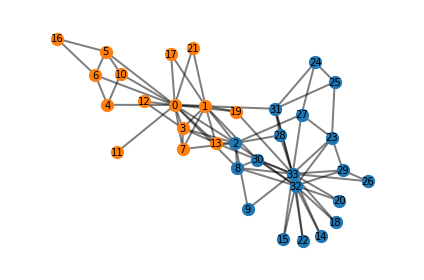

In [65]:
labels = {0:0,1:1,2:2,3:3,4:4,5:5,6:6,7:7,8:8,9:9,10:10,11:11,12:12,13:13,14:14,15:15,16:16,17:17,18:18,19:19,20:20,21:21,22:22,23:23,24:24,25:25,26:26,27:27,28:28,29:29,30:30,31:31,32:32,33:33}

pos = nx.spring_layout(G)

group1 = []
group2 = []

# Plot nodes with different properties for the "wall" and "roof" nodes
for i in range (len(group_label)):
  if group_label[i][1] == 0:
    group1.append(group_label[i][0])
  else:
    group2.append(group_label[i][0])

nx.draw_networkx_nodes(
    G, pos, node_size=150, nodelist= group1, node_color="tab:blue")
nx.draw_networkx_nodes(G, pos, node_size=150, nodelist=group2, node_color="tab:orange")
nx.draw_networkx_edges(G, pos, alpha=0.5, width=2)

nx.draw_networkx_labels(G, pos, labels, font_size=10, font_color="black")

# Customize axes
ax = plt.gca()
ax.margins(0.10)
plt.tight_layout()
plt.axis("off")
plt.show()

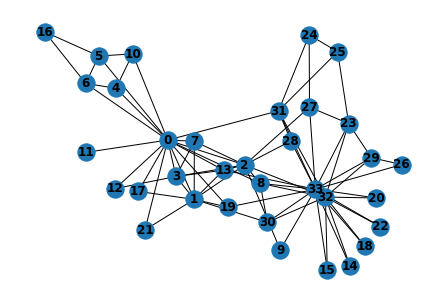

In [62]:
nx.draw(G, with_labels=True, font_weight='bold')

In [48]:
group1

[[20, 0],
 [27, 0],
 [10, 0],
 [14, 0],
 [21, 0],
 [15, 0],
 [24, 0],
 [9, 0],
 [23, 0],
 [11, 0],
 [4, 0],
 [3, 0],
 [5, 0],
 [7, 0],
 [29, 0],
 [32, 0]]